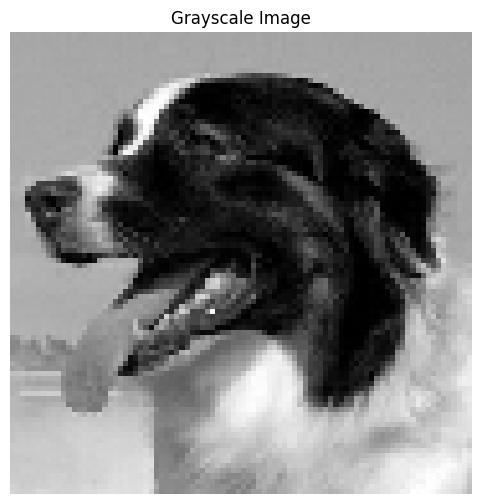

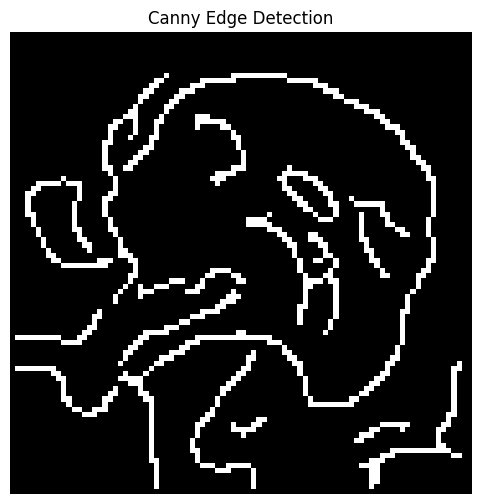

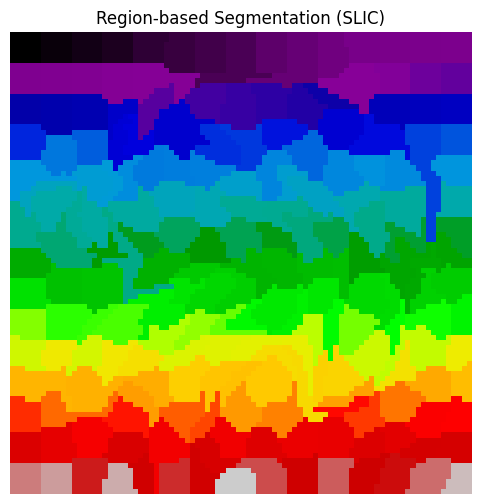

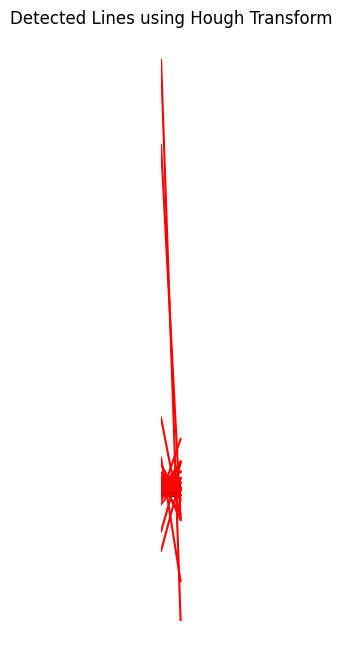

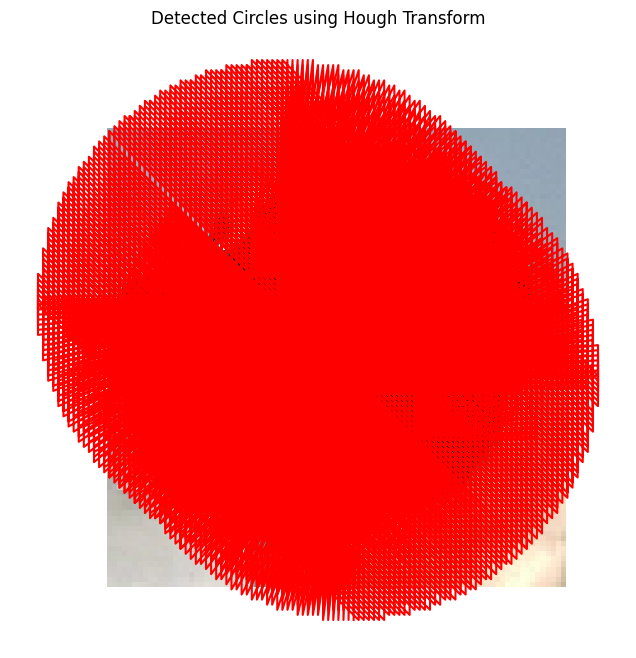

In [1]:
#Task-1: Image Segmentation and Object Detection using Hough Transform

# --- Setup and Imports ---
!pip install -q matplotlib opencv-python scikit-image

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.segmentation import slic
from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks, hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter
from skimage.color import rgb2gray

# Helper function to display images
def display_image(image, title="Image", cmap_type='gray'):
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

# --- Task 1.1: Edge-based Segmentation using Canny Edge Detection ---
image_url = 'https://upload.wikimedia.org/wikipedia/commons/7/7d/Dog_face.png'
image = io.imread(image_url)
gray_image = rgb2gray(image)

# Canny Edge Detection
edges = canny(gray_image, sigma=2.0)
display_image(gray_image, title="Grayscale Image")
display_image(edges, title="Canny Edge Detection")

# --- Task 1.2: Region-based Segmentation ---
# Using SLIC (Simple Linear Iterative Clustering) for superpixel segmentation
segments_slic = slic(image, n_segments=250, compactness=10, sigma=1, start_label=1)
display_image(segments_slic, title="Region-based Segmentation (SLIC)", cmap_type='nipy_spectral')

# --- Task 1.3: Hough Transform for Shape Detection ---
# 1. Detecting Lines using Hough Transform
h, theta, d = hough_line(edges)
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(edges, cmap='gray')
ax.set_title('Detected Lines using Hough Transform')
ax.axis('off')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = dist / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax.plot((0, image.shape[1]), (y0, y1), '-r')
plt.show()

# 2. Detecting Circles using Hough Transform
# Convert to grayscale and detect edges (if not already done)
image_gray = (gray_image * 255).astype(np.uint8)
edges = cv2.Canny(image_gray, 100, 200)

# Detect circles
hough_radii = np.arange(20, 50, 2)
hough_res = hough_circle(edges, hough_radii)

# Extracting peaks from the Hough accumulator
centers = []
radii = []
for radius, h_res in zip(hough_radii, hough_res):
    peaks = hough_circle_peaks([h_res], [radius], total_num_peaks=3)
    centers.extend(peaks[1])  # peaks[1] contains the centers
    radii.extend([radius] * len(peaks[1]))

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(image, cmap='gray')
ax.set_title('Detected Circles using Hough Transform')
ax.axis('off')

for center_y, center_x, radius in zip(centers, centers, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    ax.plot(circx, circy, '-r')
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.2/915.2 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

100%|██████████| 6.25M/6.25M [00:00<00:00, 112MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 137MB/s]


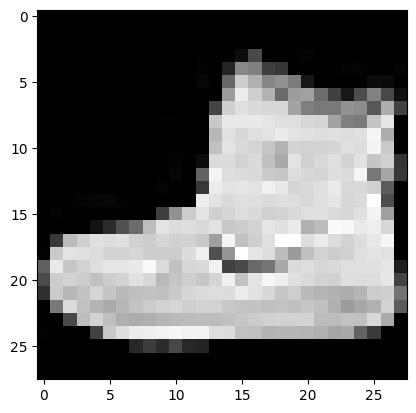


0: 640x640 (no detections), 558.3ms
Speed: 31.9ms preprocess, 558.3ms inference, 17.4ms postprocess per image at shape (1, 3, 640, 640)


AttributeError: 'list' object has no attribute 'show'

In [3]:
!pip install ultralytics

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from ultralytics import YOLO
from torch.utils.data import DataLoader, Dataset
from PIL import Image

# Load Fashion-MNIST dataset from CSV files
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

# Load Fashion-MNIST from IDX files
def load_idx_images(filename):
    with open(filename, 'rb') as f:
        f.read(16)  # Skip header
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(-1, 28, 28)
    return images

def load_idx_labels(filename):
    with open(filename, 'rb') as f:
        f.read(8)  # Skip header
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

train_images = load_idx_images('train-images-idx3-ubyte')
train_labels = load_idx_labels('train-labels-idx1-ubyte')
test_images = load_idx_images('t10k-images-idx3-ubyte')
test_labels = load_idx_labels('t10k-labels-idx1-ubyte')

# Convert to tensors
transform = transforms.Compose([transforms.ToTensor()])
trainset = torch.utils.data.TensorDataset(torch.tensor(train_images, dtype=torch.float32).unsqueeze(1), torch.tensor(train_labels, dtype=torch.long))
testset = torch.utils.data.TensorDataset(torch.tensor(test_images, dtype=torch.float32).unsqueeze(1), torch.tensor(test_labels, dtype=torch.long))
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Load YOLO model
yolo_model = YOLO("yolov8n.pt")  # Using a pre-trained YOLO model

# Load Faster R-CNN model
rcnn_model = fasterrcnn_resnet50_fpn(pretrained=True)
rcnn_model.eval()

# Function for YOLO Object Detection
def detect_objects_yolo(image):
    results = yolo_model(image)
    results.show()

# Function for RCNN Object Detection
def detect_objects_rcnn(image):
    transform = transforms.Compose([transforms.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        predictions = rcnn_model(image_tensor)
    return predictions

# Load and visualize an image
sample_image = train_images[0]
sample_pil = Image.fromarray(sample_image)
plt.imshow(sample_pil, cmap='gray')
plt.show()

# Perform YOLO detection
detect_objects_yolo(sample_pil)

# Perform RCNN detection
predictions = detect_objects_rcnn(sample_pil)
print(predictions)
